# Machine Learning Classificação - Aprovação de Empréstimos

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

## Análise e tratamento dos dados

In [22]:
dataset = pd.read_csv('database/loan_approval_dataset.csv', sep=',', encoding='iso-8859-1')
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Descrição das variáveis

- **loan_id:** Id do empréstimo
- **no_of_dependents:** Quantidade de dependentes do solicitante
- **education:** Grau de escolaridade do solicitante
- **self_employed:** Situação empregatícia do solicitante
- **income_annum:** Renda anual do solicitante
- **loan_amount:** Valor do empréstimo
- **loan_term:** Prazo do empréstimo em anos
- **cibil_score:** Score de crédito
- **residential_assets_value:** Valor dos ativos residenciais do solicitante, como casas e apartamentos próprios.
- **commercial_assets_value:** Valor dos ativos comerciais, como lojas, escritórios ou galpões.
- **luxury_assets_value:** Valor de bens de luxo, como carros esportivos, iates ou joias.
- **bank_asset_value:** Pode representar saldo bancário, investimentos líquidos ou ativos financeiros mantidos em bancos.
- **loan_status:** Status final do empréstimo

### Informações sobre o dataset

In [23]:
dataset.shape

(4269, 13)

In [24]:
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [25]:
dataset.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [26]:
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Análise dos atributos

In [27]:
dataset['loan_id'].value_counts()

loan_id
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: count, Length: 4269, dtype: int64

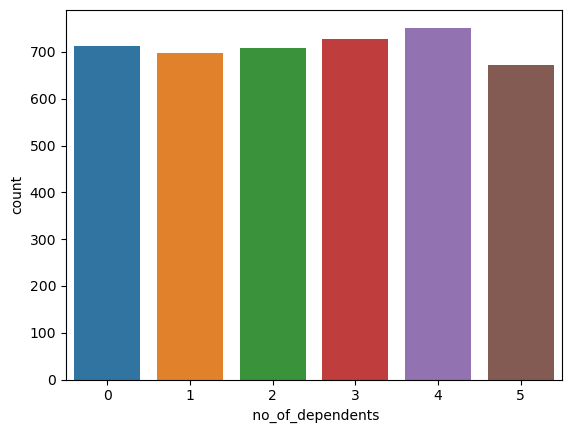

In [38]:
sns.countplot(x=' no_of_dependents', data=dataset);

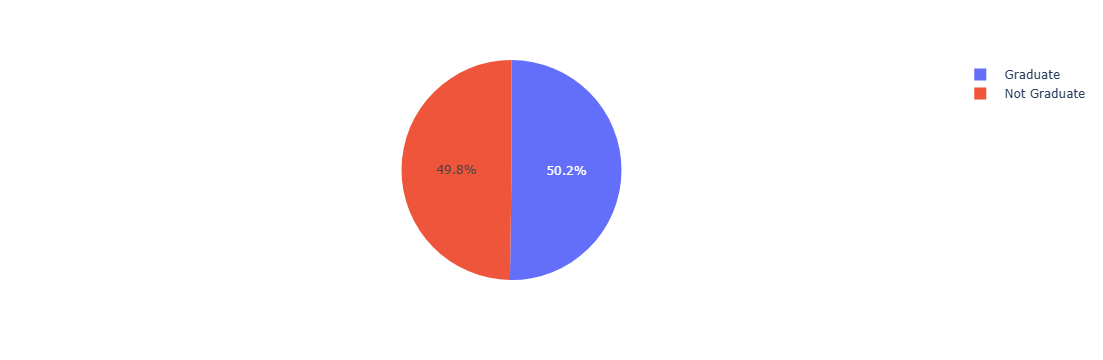

In [36]:
px.pie(dataset, ' education')

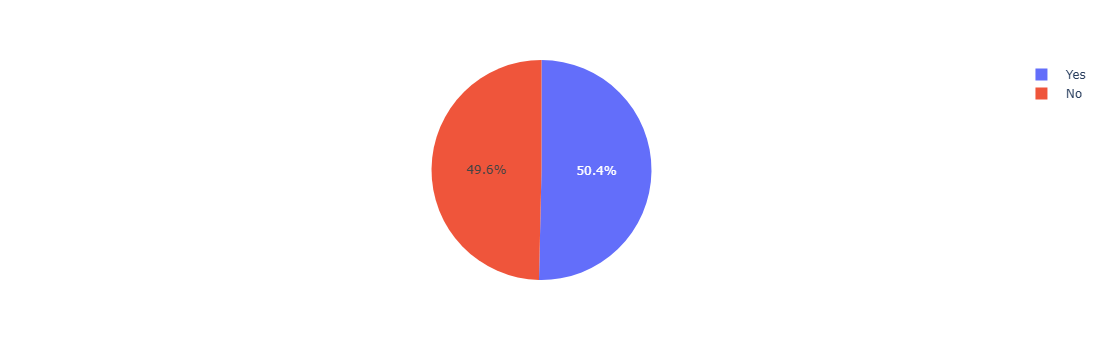

In [40]:
px.pie(dataset, ' self_employed')

C:\Users\ezequ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel=' income_annum', ylabel='Count'>

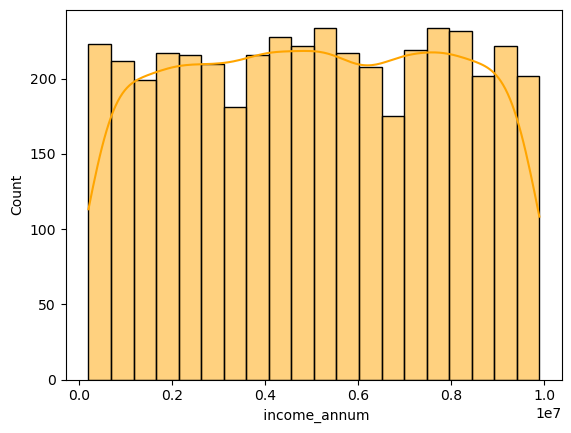

In [46]:
sns.histplot(dataset, x=' income_annum', bins=20, color="orange", kde=True, stat='count')

C:\Users\ezequ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel=' loan_amount', ylabel='Count'>

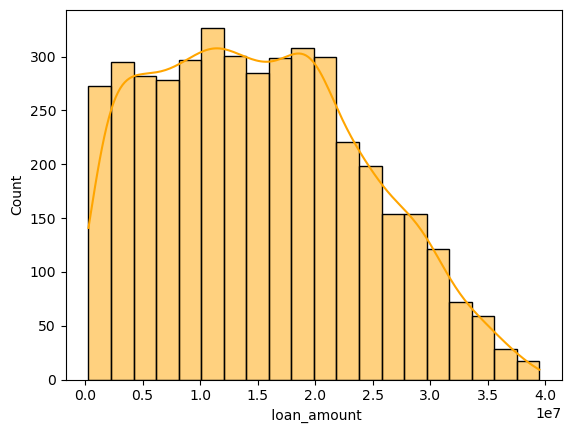

In [47]:
sns.histplot(dataset, x=' loan_amount', bins=20, color="orange", kde=True, stat='count')

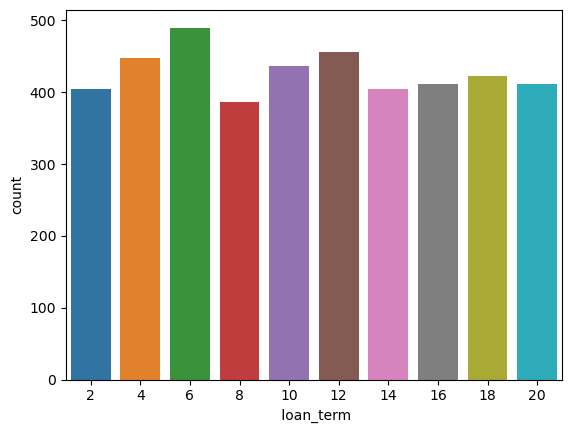

In [48]:
sns.countplot(x=' loan_term', data=dataset);

C:\Users\ezequ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel=' cibil_score', ylabel='Count'>

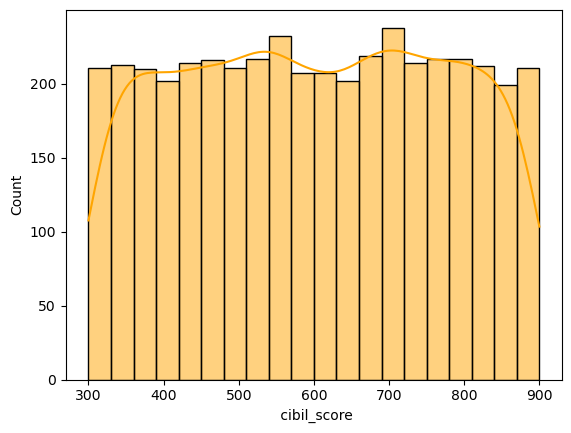

In [49]:
sns.histplot(dataset, x=' cibil_score', bins=20, color="orange", kde=True, stat='count')

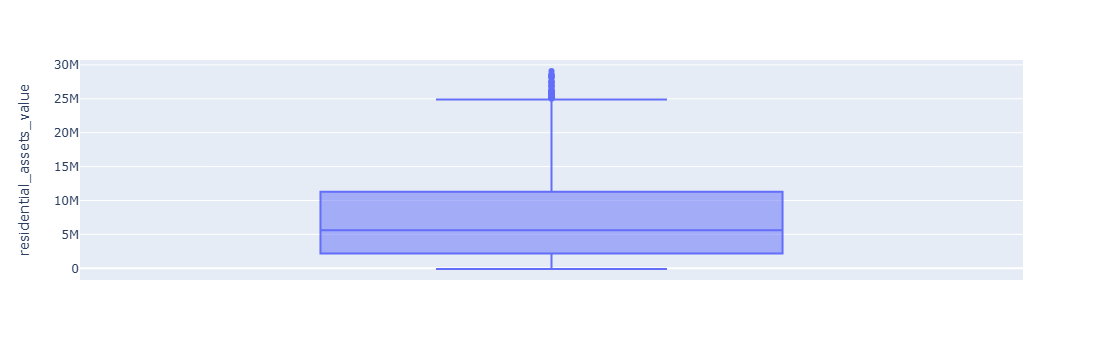

In [50]:
px.box(dataset, y=' residential_assets_value')

C:\Users\ezequ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel=' commercial_assets_value', ylabel='Count'>

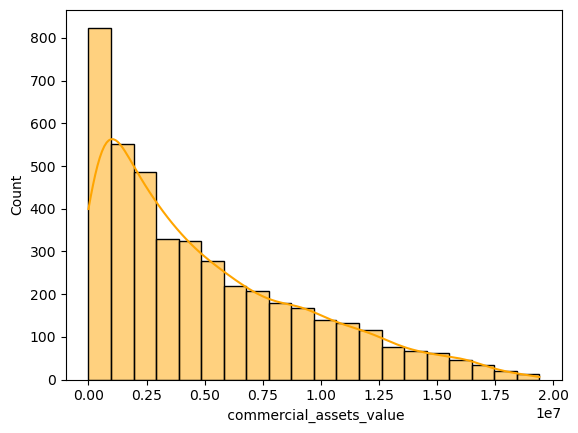

In [51]:
sns.histplot(dataset, x=' commercial_assets_value', bins=20, color="orange", kde=True, stat='count')

C:\Users\ezequ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel=' luxury_assets_value', ylabel='Count'>

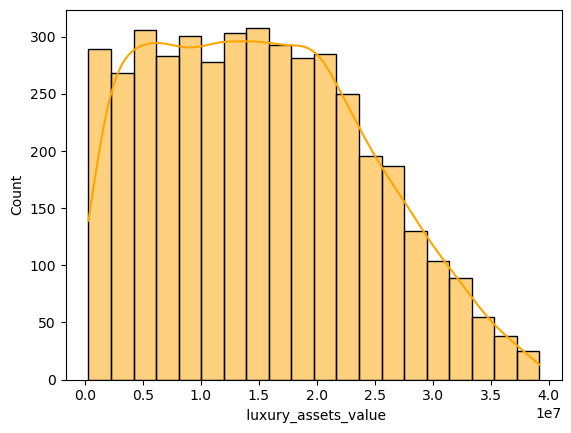

In [52]:
sns.histplot(dataset, x=' luxury_assets_value', bins=20, color="orange", kde=True, stat='count')

C:\Users\ezequ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel=' bank_asset_value', ylabel='Count'>

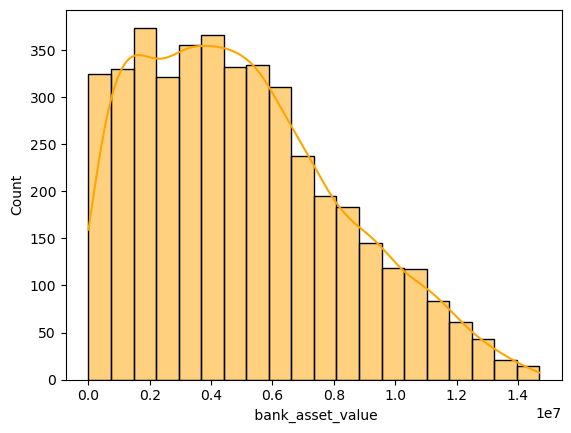

In [54]:
sns.histplot(dataset, x=' bank_asset_value', bins=20, color="orange", kde=True, stat='count')

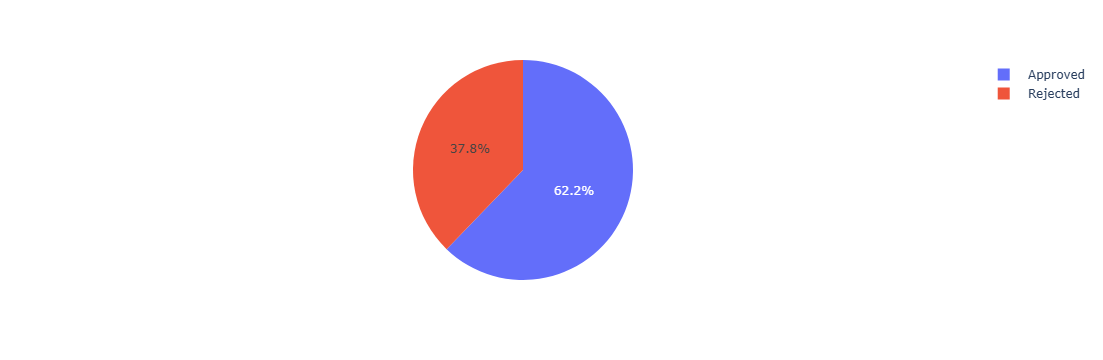

In [55]:
px.pie(dataset, ' loan_status')

### Tratamento do dataset

In [57]:
dataset.drop('loan_id', axis=1, inplace=True)
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [58]:
dataset = dataset.rename(columns={
    ' no_of_dependents': 'no_of_dependents',
    ' education': 'education',
    ' self_employed': 'self_employed',
    ' income_annum': 'income_annum',
    ' loan_amount': 'loan_amount',
    ' loan_term': 'loan_term',
    ' cibil_score': 'cibil_score',
    ' residential_assets_value': 'residential_assets_value',
    ' commercial_assets_value': 'commercial_assets_value',
    ' luxury_assets_value': 'luxury_assets_value',
    ' bank_asset_value': 'bank_asset_value',
    ' loan_status': 'loan_status'
})

In [59]:
dataset.to_csv('database/loan_approval_dataset_tratado.csv', sep=';', encoding='utf-8', index = False)

## Pré processamento dos dados

In [2]:
dataset_tratado = pd.read_csv('database/loan_approval_dataset_tratado.csv', sep=';', encoding='utf-8')
dataset_tratado.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
dataset_tratado.shape

(4269, 12)

In [4]:
df = dataset_tratado.copy()

In [5]:
df['education'].replace({' Graduate': 1, ' Not Graduate': 0}, inplace=True)
df['self_employed'].replace({' Yes': 1, ' No': 0}, inplace=True)
df['loan_status'].replace({' Approved': 1, ' Rejected': 0}, inplace=True)

In [6]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [7]:
df.dtypes

no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

### Previsores e alvo

In [8]:
previsores = df.iloc[:, 0:11].values
alvo = df.iloc[:, 11].values

print(previsores.shape, alvo.shape)

(4269, 11) (4269,)


### Escalonamento

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [11]:
previsores_esc = StandardScaler().fit_transform(previsores)

previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,4.993273e-17,-4.077840e-17,-6.324812e-17,1.681069e-16,7.323467e-17,-9.736882e-17,2.629790e-16,3.828176e-17,-1.664424e-18,-5.908706e-17,4.993273e-17
std,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00
min,-1.473548e+00,-1.004461e+00,-1.007288e+00,-1.731375e+00,-1.640450e+00,-1.559151e+00,-1.739665e+00,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00
25%,-8.838247e-01,-1.004461e+00,-1.007288e+00,-8.405896e-01,-8.220748e-01,-8.584443e-01,-8.522468e-01,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01
50%,2.956212e-01,9.955592e-01,9.927645e-01,1.456473e-02,-7.005410e-02,-1.577371e-01,3.709143e-04,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01
75%,8.853442e-01,9.955592e-01,9.927645e-01,8.697190e-01,7.040849e-01,8.933237e-01,8.587888e-01,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01
max,1.475067e+00,9.955592e-01,9.927645e-01,1.724873e+00,2.694728e+00,1.594031e+00,1.740407e+00,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00


## Base de treino e teste

In [12]:
from sklearn.model_selection import train_test_split

In [36]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size=0.3, random_state=0)

## Naive Bayes

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x_treino, y_treino)

previsoes_naive = naive.predict(x_teste)
accuracy_score(y_teste, previsoes_naive)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_naive) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_naive))

previsoes_treino = naive.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 93.29%
[[461  45]
 [ 41 734]]
Acurácia dos dados de treino: 93.21%
[[1023   84]
 [ 119 1762]]


In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 93.42%


## SVM

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, C = 8)
svm.fit(x_treino, y_treino)

previsoes_svm = svm.predict(x_teste)
accuracy_score(y_teste, previsoes_svm)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_svm) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_svm))

previsoes_treino = svm.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 94.69%
[[467  39]
 [ 29 746]]
Acurácia dos dados de treino: 97.86%
[[1073   34]
 [  30 1851]]


In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = SVC(kernel='rbf', random_state=1, C = 8)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 94.80%


## Regressão logística

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

logistica = LogisticRegression(random_state=1, max_iter=100, penalty="l1", tol=0.0001, C=1, solver="liblinear")
logistica.fit(x_treino, y_treino)

previsoes_logistica = logistica.predict(x_teste)
accuracy_score(y_teste, previsoes_logistica)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_logistica) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_logistica))

previsoes_treino = logistica.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 91.73%
[[445  61]
 [ 45 730]]
Acurácia dos dados de treino: 91.37%
[[ 976  131]
 [ 127 1754]]


In [134]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = LogisticRegression(random_state=1, max_iter=100, penalty="l1", tol=0.0001, C=1, solver="liblinear")
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 91.75%


## KNN

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2)
knn.fit(x_treino, y_treino)

previsoes_knn = knn.predict(x_teste)
accuracy_score(y_teste, previsoes_knn)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_knn) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_knn))

previsoes_treino = knn.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 91.26%
[[445  61]
 [ 51 724]]
Acurácia dos dados de treino: 92.34%
[[ 997  110]
 [ 119 1762]]


In [149]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 91.10%


## Árvore de decisão

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
arvore.fit(x_treino, y_treino)

previsoes_arvore = arvore.predict(x_teste)
accuracy_score(y_teste, previsoes_arvore)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_arvore) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_arvore))

previsoes_treino = arvore.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 96.49%
[[500   6]
 [ 39 736]]
Acurácia dos dados de treino: 96.39%
[[1097   10]
 [  98 1783]]


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.30%


## Random Forest

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

previsoes_random = random.predict(x_teste)
accuracy_score(y_teste, previsoes_random)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_random) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_random))

previsoes_treino = random.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 97.11%
[[495  11]
 [ 26 749]]
Acurácia dos dados de treino: 97.79%
[[1098    9]
 [  57 1824]]


In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.39%


## XGBoost

In [18]:
import sys
!{sys.executable} -m pip install xgboost

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xg = XGBClassifier(objective='binary:logistic', random_state=3)

param_grid = dict(
    n_estimators=[150, 200, 250, 300],
    learning_rate=[0.05, 0.1, 0.5],
    max_depth=[1,2,3,4,5],
    )

grid_search = GridSearchCV(xg, param_grid, scoring='roc_auc', cv=4)
grid_search.fit(x_treino, y_treino)

print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')

resultado = pd.DataFrame(grid_search.cv_results_)
resultado.sort_values(by='mean_test_score', ascending=False, inplace=True)
resultado.reset_index(drop=True, inplace=True)
resultado[['param_max_depth', 'param_learning_rate', 'param_n_estimators', 'mean_test_score', 'std_test_score']].head()

Melhores Hiperparâmetros: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}


,param_max_depth,param_learning_rate,param_n_estimators,mean_test_score,std_test_score
0,4,0.05,150,0.997796,0.000766
1,4,0.05,200,0.997551,0.001058
2,5,0.05,150,0.997475,0.001005
3,5,0.05,200,0.997403,0.001167
4,3,0.1,200,0.997372,0.001422


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

xg = XGBClassifier(max_depth=4, learning_rate=0.05, n_estimators=150, objective='binary:logistic', random_state=3)
xg.fit(x_treino,y_treino)

previsoes_xg = xg.predict(x_teste)

print(f'Acurácia dos dados de teste: {accuracy_score(y_teste, previsoes_xg) * 100:.2f}%')
print(confusion_matrix(y_teste, previsoes_xg))

previsoes_treino = xg.predict(x_treino)
print(f'Acurácia dos dados de treino: {accuracy_score(y_treino, previsoes_treino) * 100:.2f}%')
print(confusion_matrix(y_treino, previsoes_treino))

Acurácia dos dados de teste: 97.89%
[[484  22]
 [  5 770]]
Acurácia dos dados de treino: 99.53%
[[1093   14]
 [   0 1881]]


In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
modelo = XGBClassifier(max_depth=4, learning_rate=0.05, n_estimators=150, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 98.52%


## Resumo dos Resultados

**Naive Bayes:** 93,29% (teste)/ 93,21%(treino) - Validação cruzada 93,42% - previsores_esc
> naive = GaussianNB()

**SVM:** 94,69% (teste)/ 97,86%(treino) - Validação cruzada 94,80% - previsores_esc
> svm = SVC(kernel='rbf', random_state=1, C = 8)

**Regressão Logística:** 91,73% (teste)/ 91,37%(treino) - Validação cruzada 91,75% - previsores_esc
> logistica = LogisticRegression(random_state=1, max_iter=100, penalty="l1", tol=0.0001, C=1, solver="liblinear")

**KNN:** 91,26% (teste)/ 92,34%(treino) - Validação cruzada 91,10% - previsores_esc
> knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2)

**Árvore de decisão:** 96,49% (teste)/ 96,39%(treino) - Validação cruzada 96,30% - previsores_esc
> arvore = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)

**Random Forest:** 97.11% (teste)/ 97.79%(treino) - Validação cruzada 96.39% - previsores_esc
> random = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state = 0, max_depth=4)

**XGBoost:** 97.89% (teste)/ 99.53%(treino) - Validação cruzada 98.52% - previsores_esc
> xg = XGBClassifier(max_depth=4, learning_rate=0.05, n_estimators=150, objective='binary:logistic', random_state=3)
